In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Read in data, fix cols for the visuals
df = pd.read_csv("../Web-Scraping-Stats/cleaned_stats_data/player_stats_combined.csv", index_col=False)
df.rename(columns={'X3P':'ThreeP', 'X3PA': 'ThreeP_Attempted', 'X3P.': 'ThreeP_Percentage', 'FG.': 'FG_Percentage', 'FT.': 'FT_Percentage'}, inplace=True)
df.head()

,Players,Tm,MP,FG,FGA,ThreeP,ThreeP_Attempted,FT,FTA,ORB,...,BLK,TOV,PF,PTS,FG_Percentage,ThreeP_Percentage,FT_Percentage,Player_Type,Region,Year
0,George Gervin,SAS,40:00:00,14,26,0,0,6,9,4,...,0,3,2,34,0.538,NaN,0.667,Starter,East,1980
1,Eddie Johnson,ATL,32:00:00,11,16,0,0,0,0,1,...,0,2,2,22,0.688,NaN,NaN,Starter,East,1980
2,Moses Malone,HOU,31:00:00,7,12,0,0,6,12,6,...,2,5,4,20,0.583,NaN,0.500,Starter,East,1980
3,Julius Erving,PHI,20:00,4,12,0,0,3,4,2,...,1,2,5,11,0.333,NaN,0.750,Starter,East,1980
4,John Drew,ATL,15:00,0,4,0,0,4,5,1,...,0,3,5,4,0.000,NaN,0.800,Starter,East,1980


In [10]:
# Creating subsets of dataframe to create the NBA Divisions
Atlantic_Div = df.loc[df['Tm'].isin(["BOS", "PHI", "NYK", "TOR", "BKN"])]
Central_Div = df.loc[df['Tm'].isin(["IND", "MIL", "DET", "CHI", "CLE"])]
Southeast_Div = df.loc[df['Tm'].isin(["ORL", "CHA", "WSH", "MIA", "ATL"])]
Northwest_Div = df.loc[df['Tm'].isin(["DEN", "OKC", "MIN", "UTA", "POR"])]
Pacific_Div = df.loc[df['Tm'].isin(["PHO", "GSW", "LAL", "LAC", "SAC"])]
Southwest_Div = df.loc[df['Tm'].isin(["DAL", "NOH", "SAS", "HOU", "MEM"])]

In [11]:
# Find duplicates
df.duplicated().sum()

0

In [12]:
# Find null values
df.isnull().sum()

Players                0
Tm                     0
MP                     0
FG                     0
FGA                    0
ThreeP                 0
ThreeP_Attempted       0
FT                     0
FTA                    0
ORB                    0
DRB                    0
TRB                    0
AST                    0
STL                    0
BLK                    0
TOV                    0
PF                     0
PTS                    0
FG_Percentage          6
ThreeP_Percentage    397
FT_Percentage        294
Player_Type            0
Region                 0
Year                   0
dtype: int64

In [13]:
# Look at general information of the dataframe
print("number of rows:", len(df.index))
print("number of col:",  len(df.columns))
print("keys:",  df.keys(),type(df.keys()))
print("info",df.info() )
print("head", df.head())
print("TYPES", df.dtypes)

number of rows: 715
number of col: 24
keys: Index(['Players', 'Tm', 'MP', 'FG', 'FGA', 'ThreeP', 'ThreeP_Attempted', 'FT',
       'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'FG_Percentage', 'ThreeP_Percentage', 'FT_Percentage', 'Player_Type',
       'Region', 'Year'],
      dtype='object') <class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Players            715 non-null    object 
 1   Tm                 715 non-null    object 
 2   MP                 715 non-null    object 
 3   FG                 715 non-null    int64  
 4   FGA                715 non-null    int64  
 5   ThreeP             715 non-null    int64  
 6   ThreeP_Attempted   715 non-null    int64  
 7   FT                 715 non-null    int64  
 8   FTA                715 non-null    int64  
 9

In [17]:
# Look at statitics of numerical columns
df.describe()

,FG,FGA,ThreeP,ThreeP_Attempted,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG_Percentage,ThreeP_Percentage,FT_Percentage,Year
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,709.000000,318.000000,421.000000,715.000000
mean,4.513287,9.211189,0.422378,1.283916,1.511888,2.139860,1.581818,2.925874,4.507692,2.769231,1.131469,0.509091,1.738462,1.664336,10.960839,0.480240,0.296057,0.697900,1994.945455
std,2.972004,4.903996,0.904735,2.002577,1.948442,2.577106,1.639825,2.449796,3.377448,3.044240,1.280998,0.894029,1.615789,1.423807,7.060255,0.198504,0.332804,0.308193,9.026174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000
25%,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.364000,0.000000,0.500000,1987.000000
50%,4.000000,8.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000,10.000000,0.500000,0.250000,0.750000,1995.000000
75%,6.000000,12.000000,0.000000,2.000000,2.000000,3.000000,2.000000,4.000000,6.000000,4.000000,2.000000,1.000000,3.000000,3.000000,15.000000,0.600000,0.500000,1.000000,2003.000000
max,17.000000,27.000000,6.000000,11.000000,11.000000,13.000000,9.000000,19.000000,22.000000,22.000000,7.000000,6.000000,12.000000,6.000000,40.000000,1.000000,1.000000,1.000000,2010.000000


In [18]:
# Correlation matrices
print("PEARSON CORRELATION MATRIX:")
print(df.corr(method='pearson',numeric_only=True))

print("SPEARMAN CORRELATION MATRIX:")
print(df.corr(method='spearman',numeric_only=True))

PEARSON CORRELATION MATRIX:
                         FG       FGA    ThreeP  ThreeP_Attempted        FT  \
FG                 1.000000  0.862599  0.265638          0.214803  0.313484   
FGA                0.862599  1.000000  0.268072          0.316622  0.344411   
ThreeP             0.265638  0.268072  1.000000          0.810324 -0.061645   
ThreeP_Attempted   0.214803  0.316622  0.810324          1.000000 -0.084679   
FT                 0.313484  0.344411 -0.061645         -0.084679  1.000000   
FTA                0.315374  0.338986 -0.062614         -0.097532  0.927361   
ORB                0.280618  0.333372 -0.180034         -0.213295  0.243744   
DRB                0.227605  0.223272 -0.082535         -0.107900  0.198681   
TRB                0.301337  0.323807 -0.147277         -0.181823  0.262454   
AST                0.186797  0.209662  0.180874          0.214081  0.081099   
STL                0.324377  0.349169  0.146582          0.172149  0.191842   
BLK                0.156

In [16]:
# Frequency of teams
df['Tm'].value_counts()

Tm
LAL    52
BOS    48
DET    45
PHO    41
SAS    39
OKC    38
PHI    35
UTA    34
HOU    32
ATL    28
DAL    25
CLE    25
CHI    25
DEN    23
MIL    22
NYK    22
POR    20
ORL    18
WAS    18
BKN    18
IND    16
SAC    15
MIA    15
GSW    13
MIN    13
CHA     9
TOR     9
LAC     8
NOH     7
MEM     2
Name: count, dtype: int64

In [31]:
pd.crosstab(df['Region'], df['Tm'])

Tm,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
Region,,,,,,,,,,,,,,,,,,,,,
East,28,18,48,9,25,25,0,0,45,0,...,0,18,35,0,0,0,1,9,0,18
West,0,0,0,0,0,0,25,23,0,13,...,38,0,0,41,20,15,38,0,34,0


/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

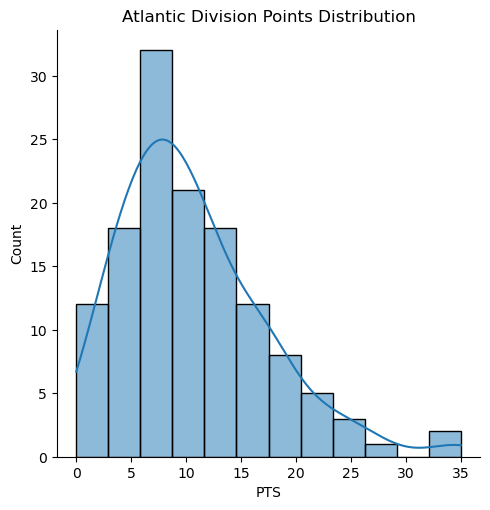

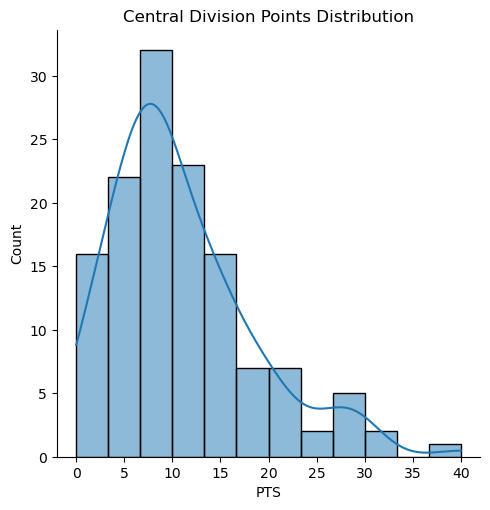

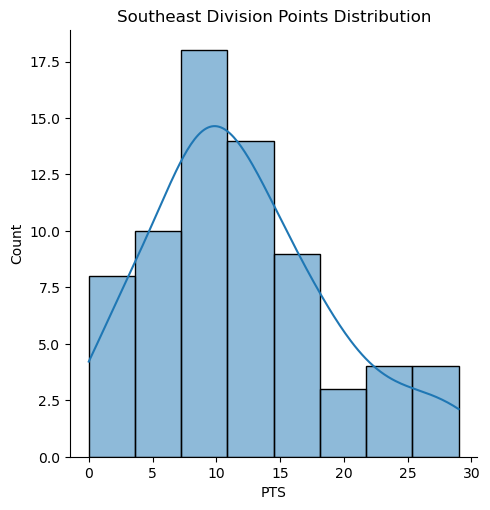

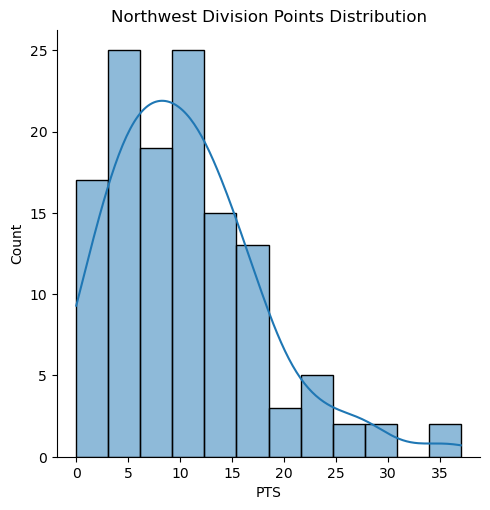

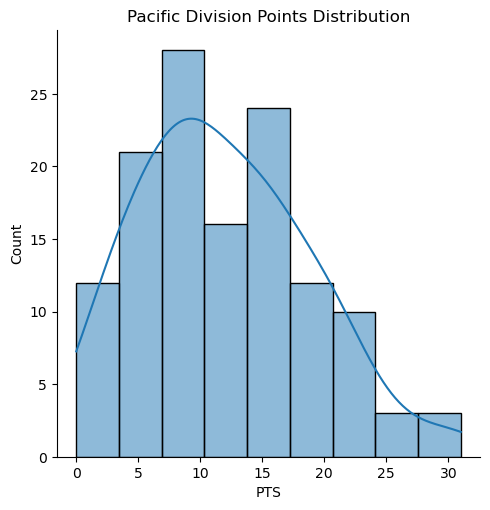

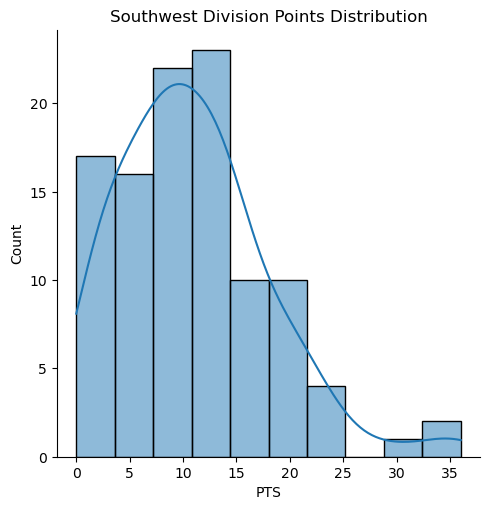

In [29]:
# Distributions of Points by Division

sns.displot(data=Atlantic_Div, x="PTS", kde=True).set(title='Atlantic Division Points Distribution')
plt.show

sns.displot(data=Central_Div, x="PTS", kde=True).set(title='Central Division Points Distribution')
plt.show

sns.displot(data=Southeast_Div, x="PTS", kde=True).set(title='Southeast Division Points Distribution')
plt.show

sns.displot(data=Northwest_Div, x="PTS", kde=True).set(title='Northwest Division Points Distribution')
plt.show

sns.displot(data=Pacific_Div, x="PTS", kde=True).set(title='Pacific Division Points Distribution')
plt.show

sns.displot(data=Southwest_Div, x="PTS", kde=True).set(title='Southwest Division Points Distribution')
plt.show

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

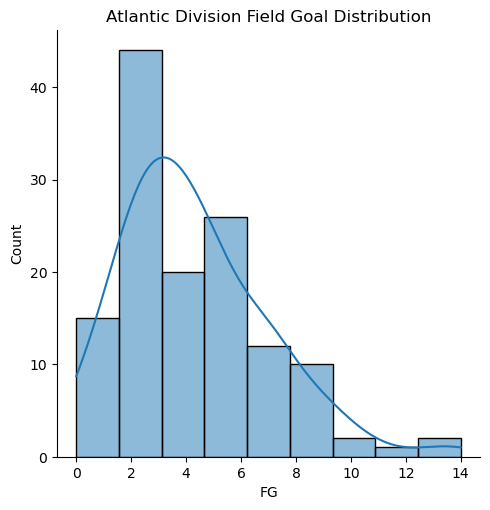

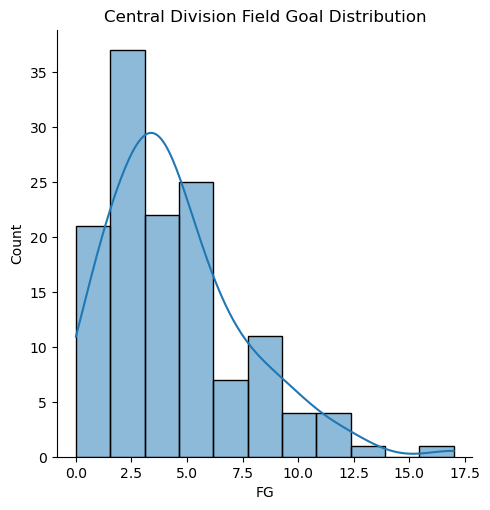

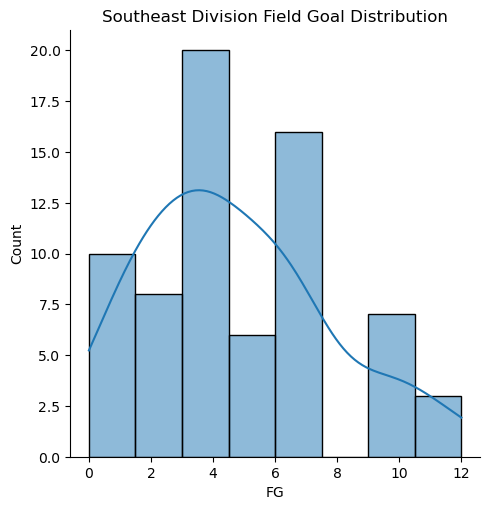

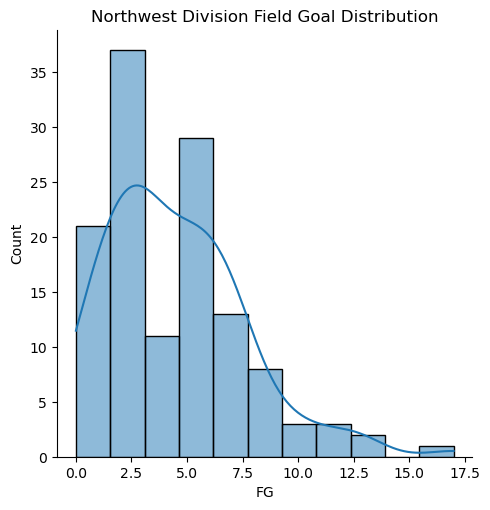

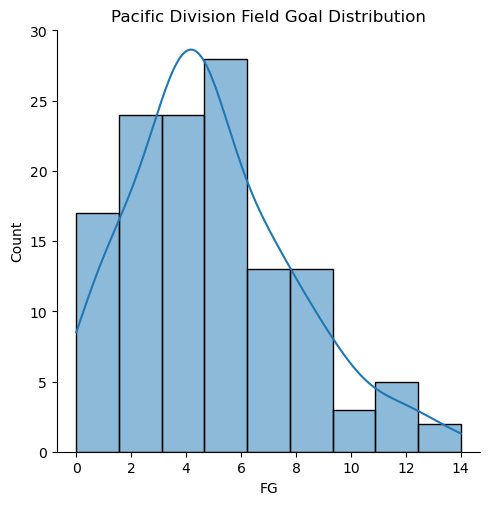

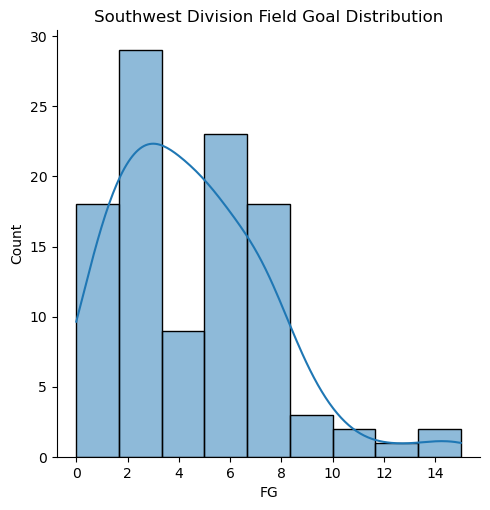

In [21]:
# Distributions of Field Goals by Division

sns.displot(data=Atlantic_Div, x="FG", kde=True).set(title='Atlantic Division Field Goal Distribution')
plt.show

sns.displot(data=Central_Div, x="FG", kde=True).set(title='Central Division Field Goal Distribution')
plt.show

sns.displot(data=Southeast_Div, x="FG", kde=True).set(title='Southeast Division Field Goal Distribution')
plt.show

sns.displot(data=Northwest_Div, x="FG", kde=True).set(title='Northwest Division Field Goal Distribution')
plt.show

sns.displot(data=Pacific_Div, x="FG", kde=True).set(title='Pacific Division Field Goal Distribution')
plt.show

sns.displot(data=Southwest_Div, x="FG", kde=True).set(title='Southwest Division Field Goal Distribution')
plt.show

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

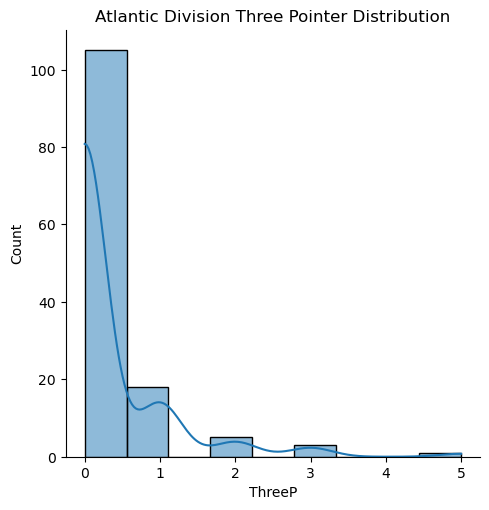

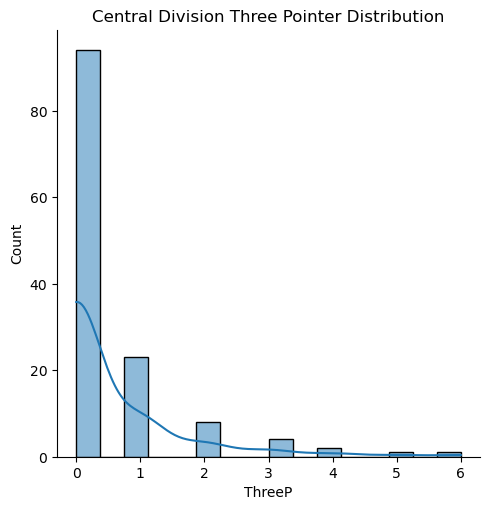

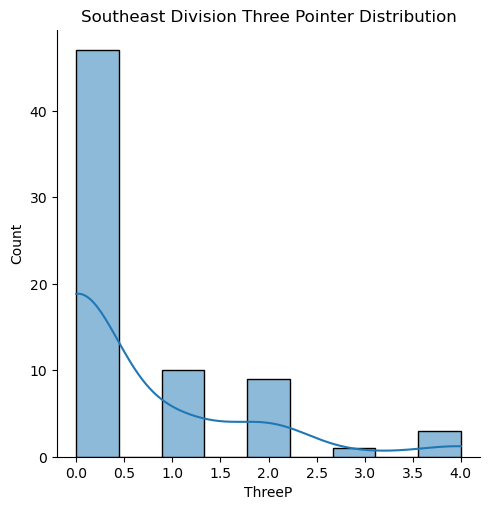

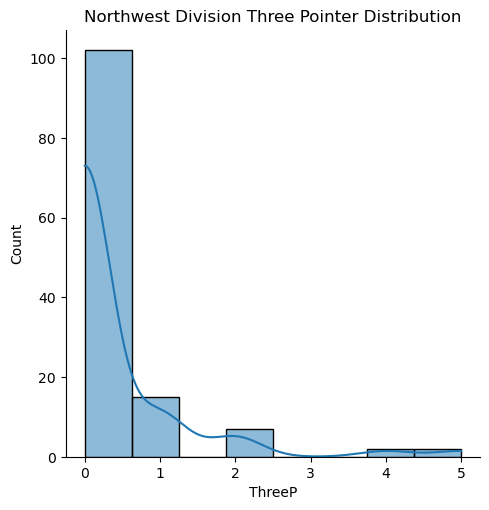

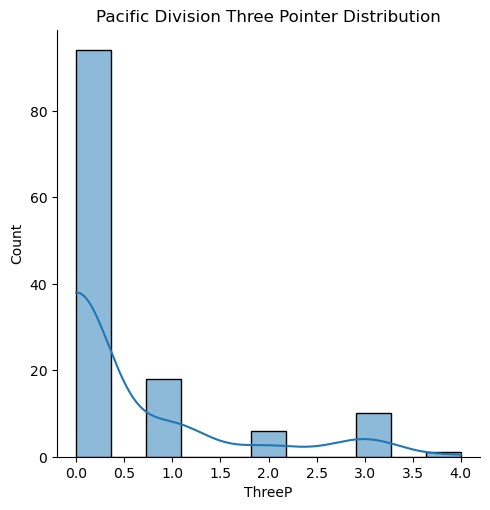

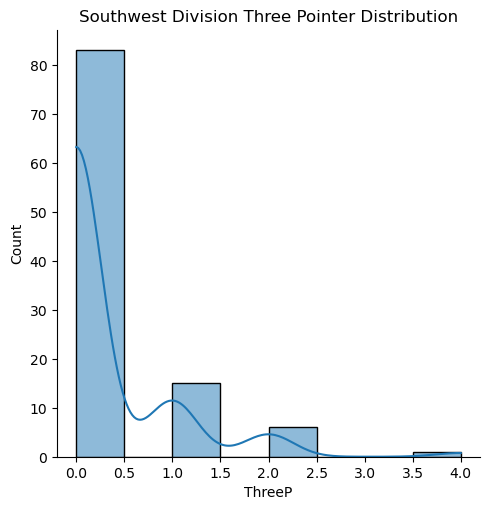

In [23]:
# Distributions of Three Pointers by Division

sns.displot(data=Atlantic_Div, x="ThreeP", kde=True).set(title='Atlantic Division Three Pointer Distribution')
plt.show

sns.displot(data=Central_Div, x="ThreeP", kde=True).set(title='Central Division Three Pointer Distribution')
plt.show

sns.displot(data=Southeast_Div, x="ThreeP", kde=True).set(title='Southeast Division Three Pointer Distribution')
plt.show

sns.displot(data=Northwest_Div, x="ThreeP", kde=True).set(title='Northwest Division Three Pointer Distribution')
plt.show

sns.displot(data=Pacific_Div, x="ThreeP", kde=True).set(title='Pacific Division Three Pointer Distribution')
plt.show

sns.displot(data=Southwest_Div, x="ThreeP", kde=True).set(title='Southwest Division Three Pointer Distribution')
plt.show

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

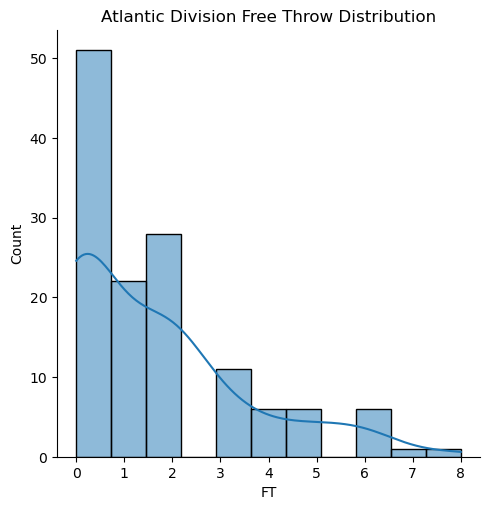

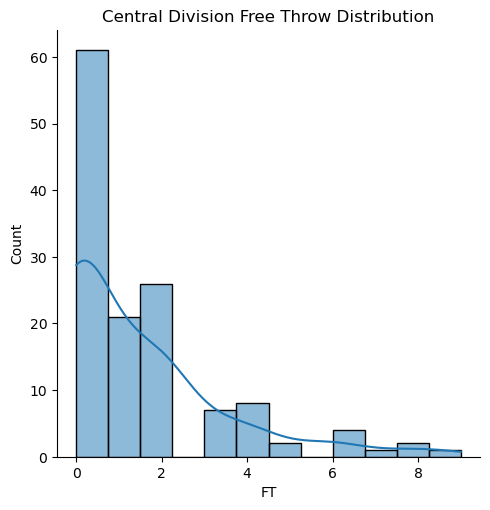

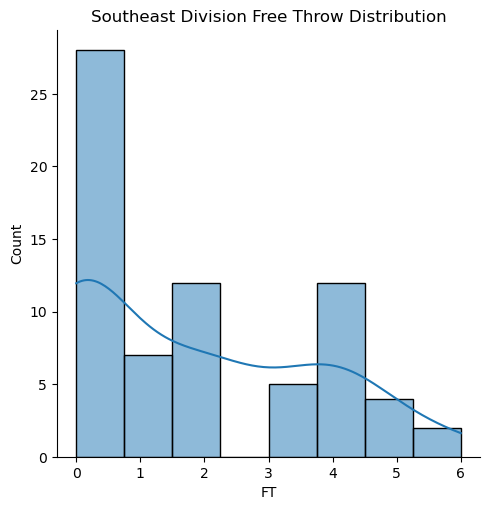

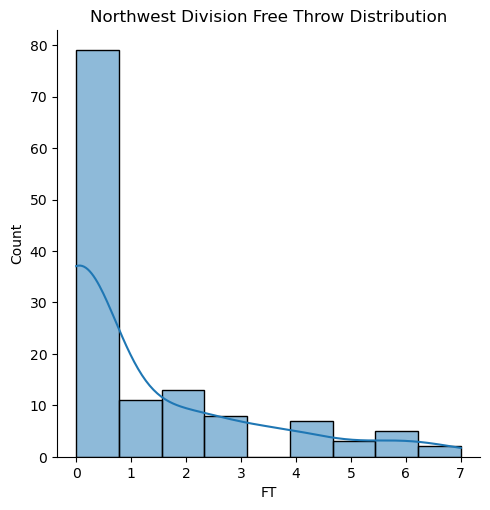

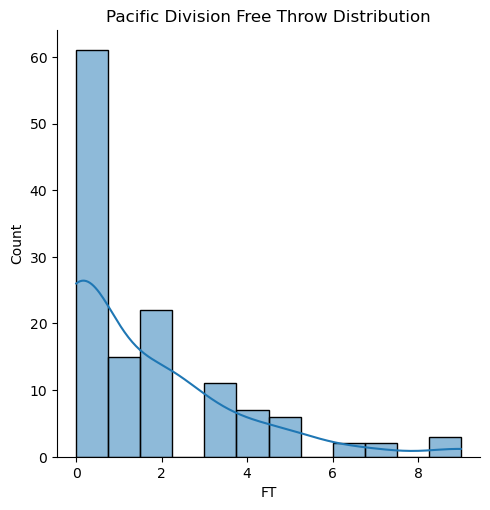

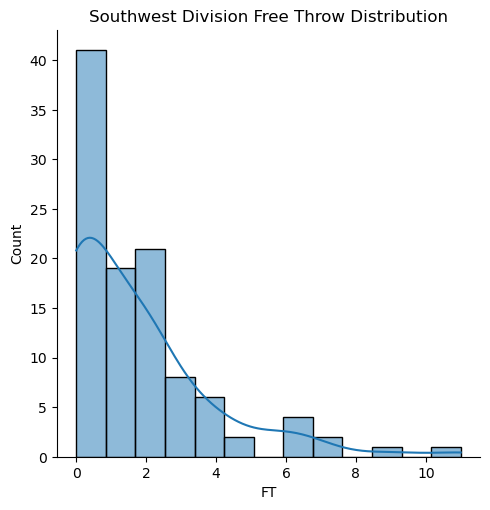

In [24]:
# Distributions of Free Throws by Division

sns.displot(data=Atlantic_Div, x="FT", kde=True).set(title='Atlantic Division Free Throw Distribution')
plt.show

sns.displot(data=Central_Div, x="FT", kde=True).set(title='Central Division Free Throw Distribution')
plt.show

sns.displot(data=Southeast_Div, x="FT", kde=True).set(title='Southeast Division Free Throw Distribution')
plt.show

sns.displot(data=Northwest_Div, x="FT", kde=True).set(title='Northwest Division Free Throw Distribution')
plt.show

sns.displot(data=Pacific_Div, x="FT", kde=True).set(title='Pacific Division Free Throw Distribution')
plt.show

sns.displot(data=Southwest_Div, x="FT", kde=True).set(title='Southwest Division Free Throw Distribution')
plt.show

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

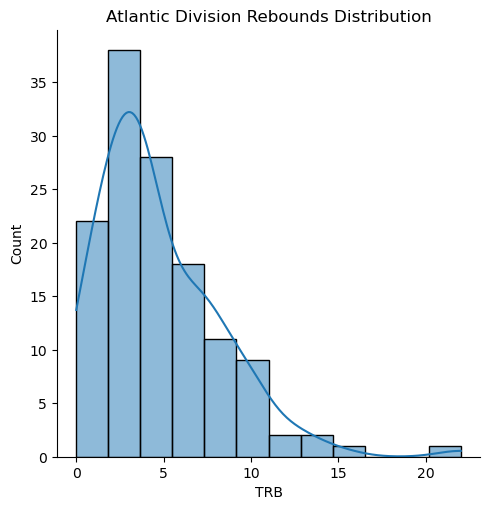

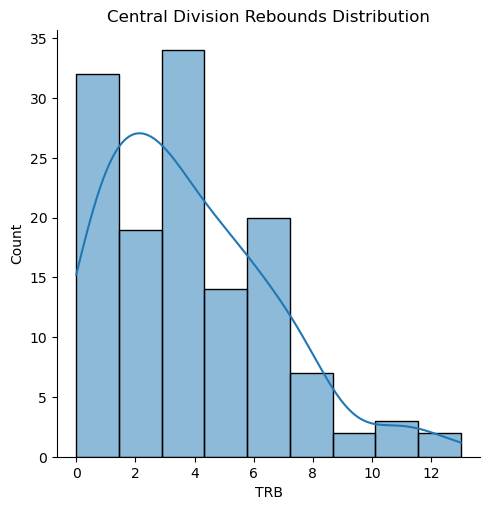

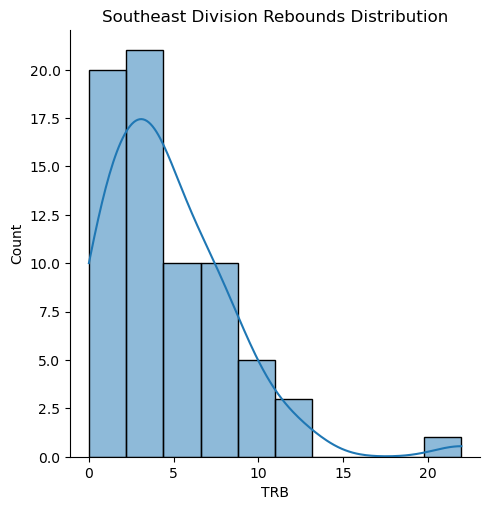

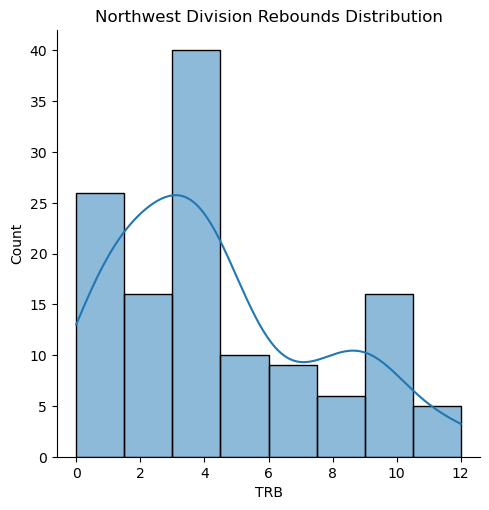

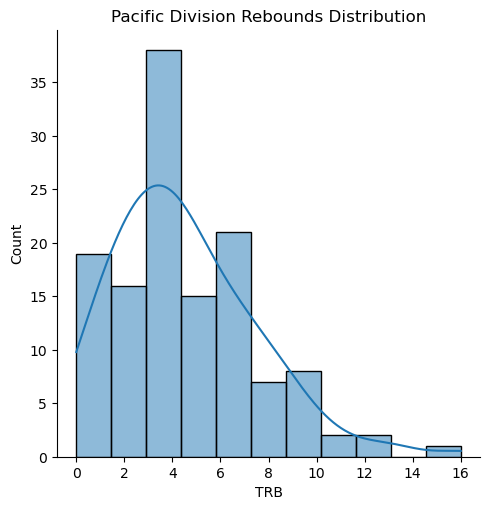

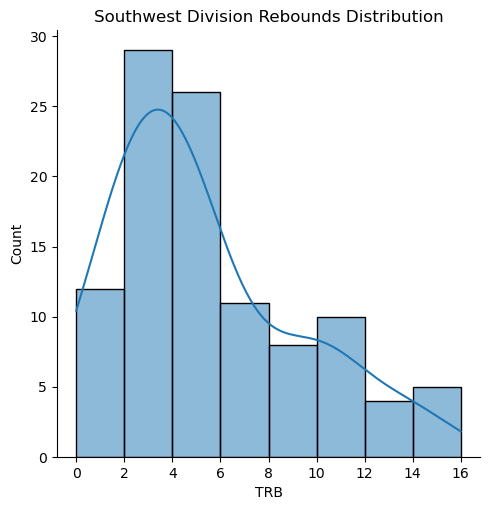

In [25]:
# Distributions of Rebounds by Division

sns.displot(data=Atlantic_Div, x="TRB", kde=True).set(title='Atlantic Division Rebounds Distribution')
plt.show

sns.displot(data=Central_Div, x="TRB", kde=True).set(title='Central Division Rebounds Distribution')
plt.show

sns.displot(data=Southeast_Div, x="TRB", kde=True).set(title='Southeast Division Rebounds Distribution')
plt.show

sns.displot(data=Northwest_Div, x="TRB", kde=True).set(title='Northwest Division Rebounds Distribution')
plt.show

sns.displot(data=Pacific_Div, x="TRB", kde=True).set(title='Pacific Division Rebounds Distribution')
plt.show

sns.displot(data=Southwest_Div, x="TRB", kde=True).set(title='Southwest Division Rebounds Distribution')
plt.show

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

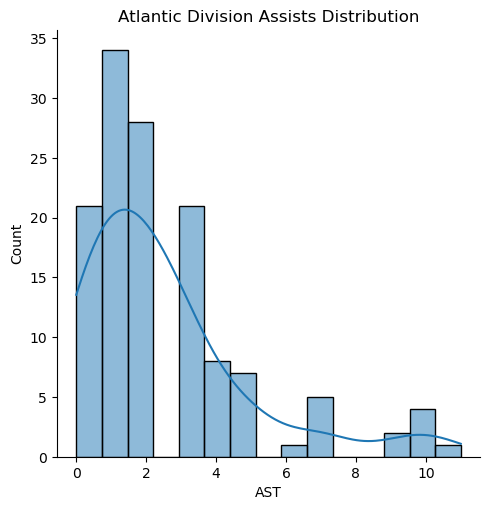

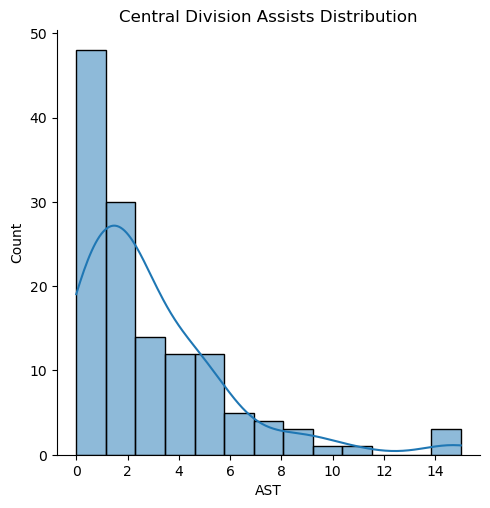

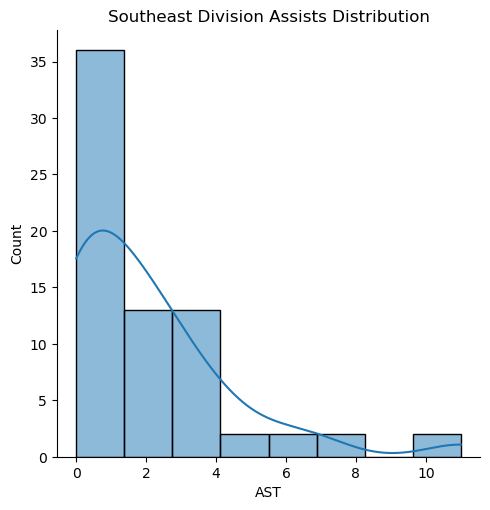

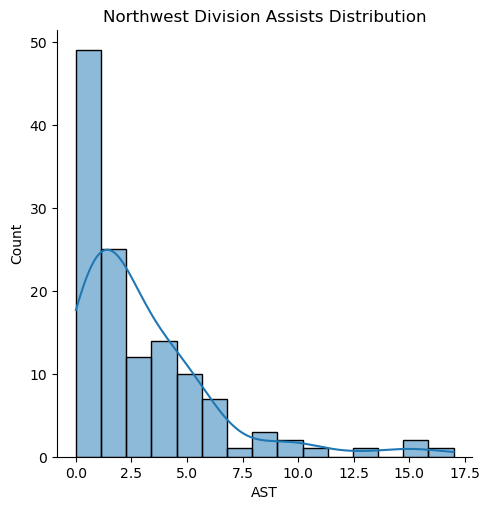

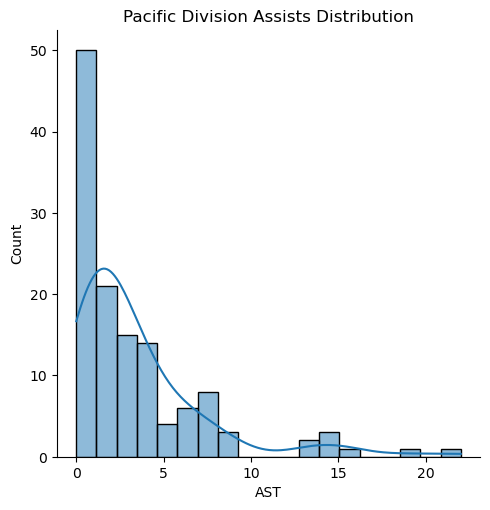

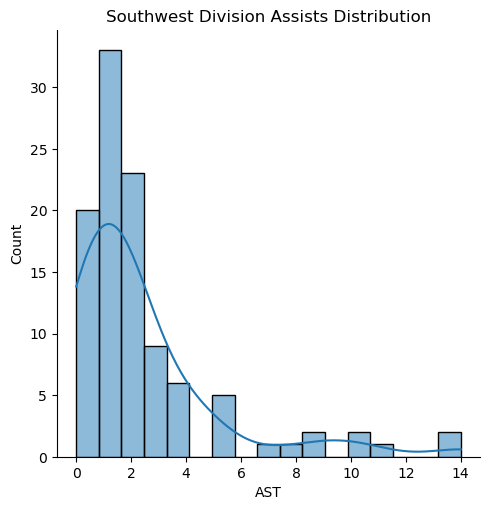

In [26]:
# Distributions of Assists by Division

sns.displot(data=Atlantic_Div, x="AST", kde=True).set(title='Atlantic Division Assists Distribution')
plt.show

sns.displot(data=Central_Div, x="AST", kde=True).set(title='Central Division Assists Distribution')
plt.show

sns.displot(data=Southeast_Div, x="AST", kde=True).set(title='Southeast Division Assists Distribution')
plt.show

sns.displot(data=Northwest_Div, x="AST", kde=True).set(title='Northwest Division Assists Distribution')
plt.show

sns.displot(data=Pacific_Div, x="AST", kde=True).set(title='Pacific Division Assists Distribution')
plt.show

sns.displot(data=Southwest_Div, x="AST", kde=True).set(title='Southwest Division Assists Distribution')
plt.show

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

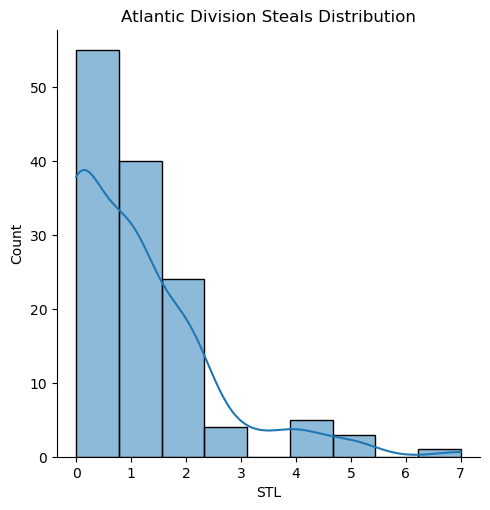

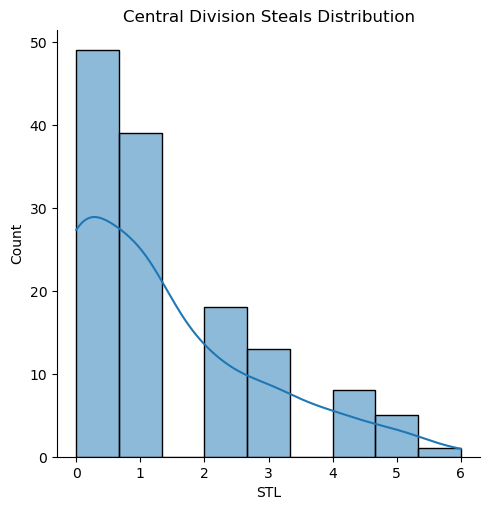

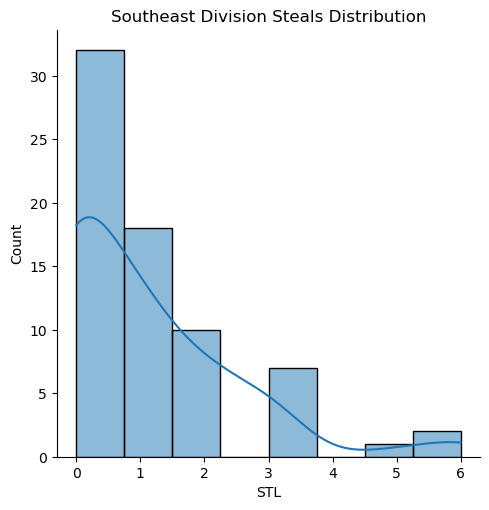

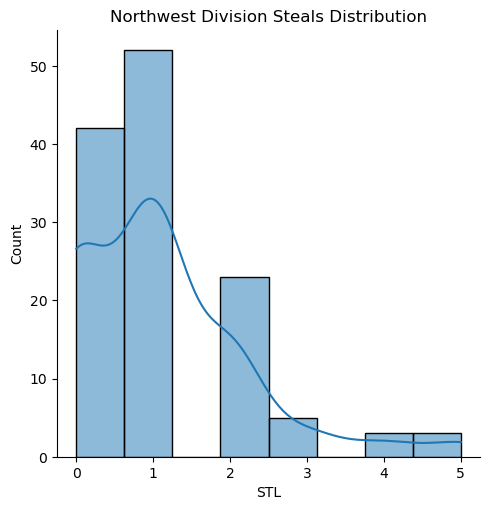

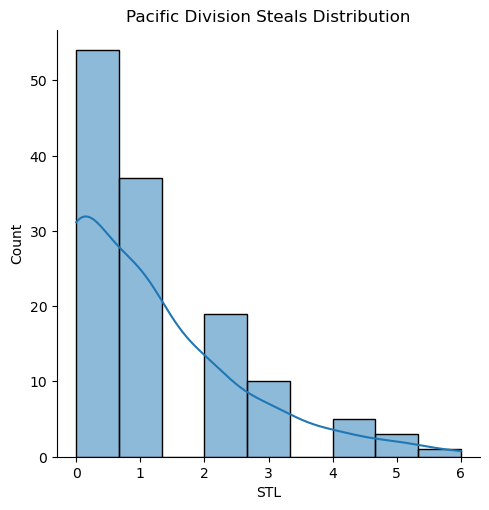

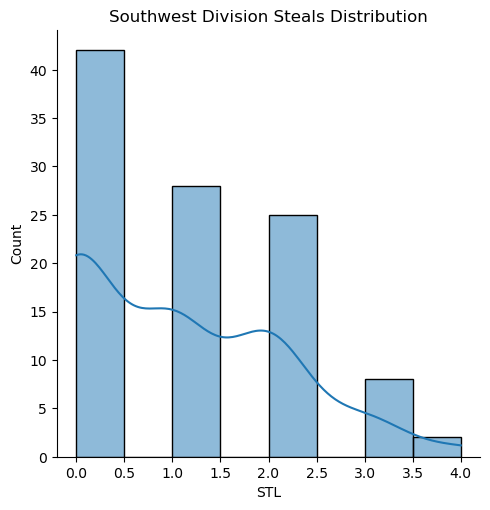

In [27]:
# Distributions of Steals by Division

sns.displot(data=Atlantic_Div, x="STL", kde=True).set(title='Atlantic Division Steals Distribution')
plt.show

sns.displot(data=Central_Div, x="STL", kde=True).set(title='Central Division Steals Distribution')
plt.show

sns.displot(data=Southeast_Div, x="STL", kde=True).set(title='Southeast Division Steals Distribution')
plt.show

sns.displot(data=Northwest_Div, x="STL", kde=True).set(title='Northwest Division Steals Distribution')
plt.show

sns.displot(data=Pacific_Div, x="STL", kde=True).set(title='Pacific Division Steals Distribution')
plt.show

sns.displot(data=Southwest_Div, x="STL", kde=True).set(title='Southwest Division Steals Distribution')
plt.show

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

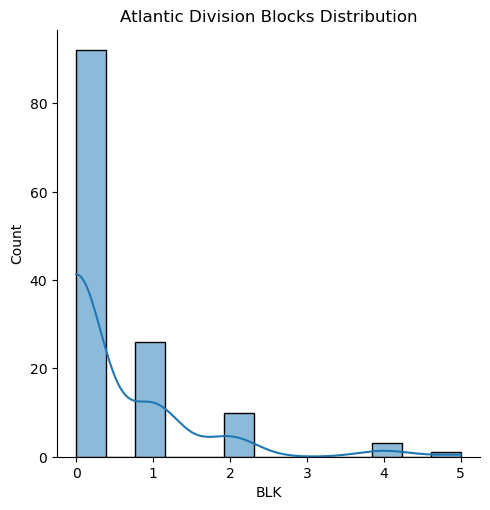

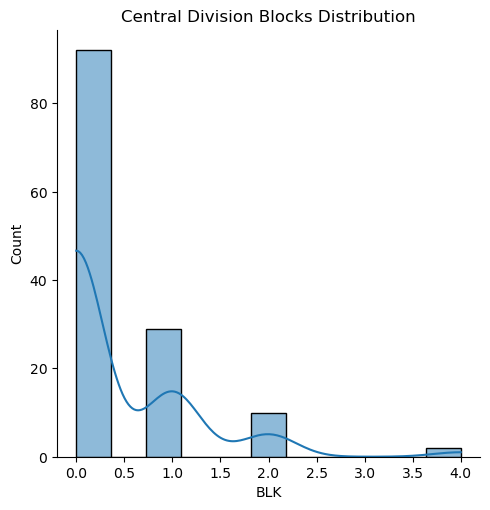

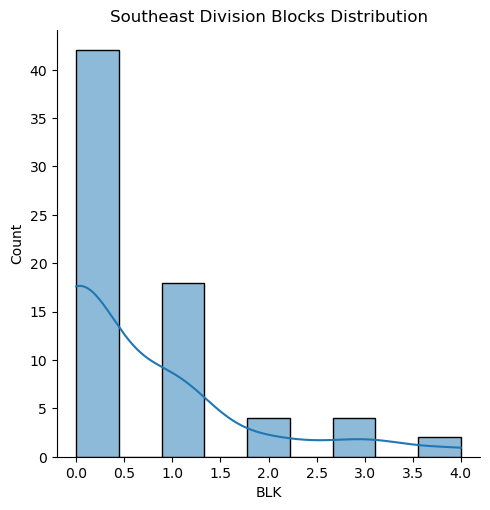

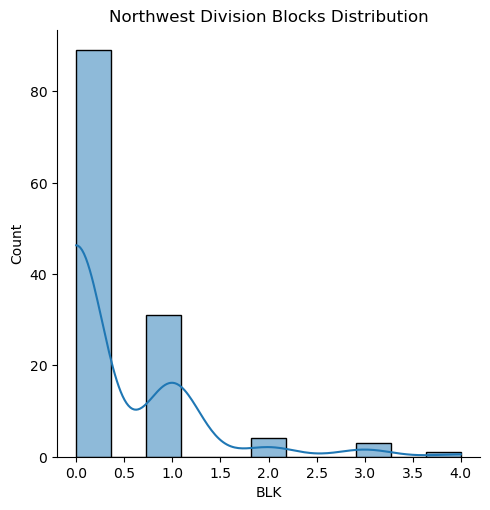

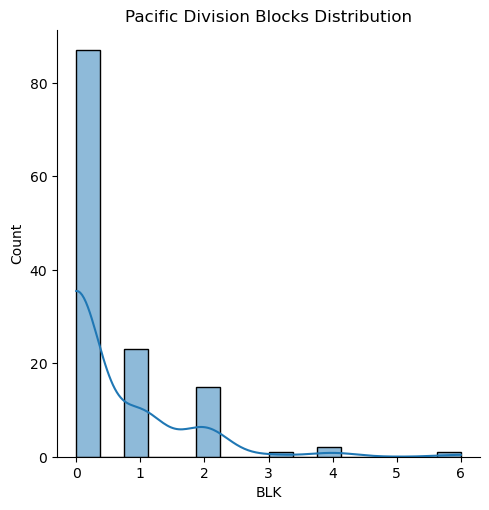

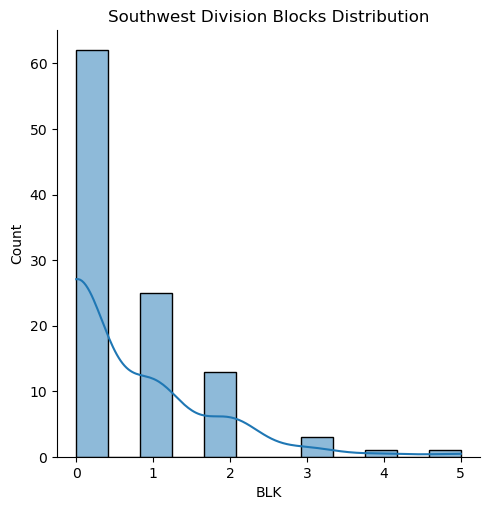

In [28]:
# Distributions of Blocks by Division

sns.displot(data=Atlantic_Div, x="BLK", kde=True).set(title='Atlantic Division Blocks Distribution')
plt.show

sns.displot(data=Central_Div, x="BLK", kde=True).set(title='Central Division Blocks Distribution')
plt.show

sns.displot(data=Southeast_Div, x="BLK", kde=True).set(title='Southeast Division Blocks Distribution')
plt.show

sns.displot(data=Northwest_Div, x="BLK", kde=True).set(title='Northwest Division Blocks Distribution')
plt.show

sns.displot(data=Pacific_Div, x="BLK", kde=True).set(title='Pacific Division Blocks Distribution')
plt.show

sns.displot(data=Southwest_Div, x="BLK", kde=True).set(title='Southwest Division Blocks Distribution')
plt.show

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

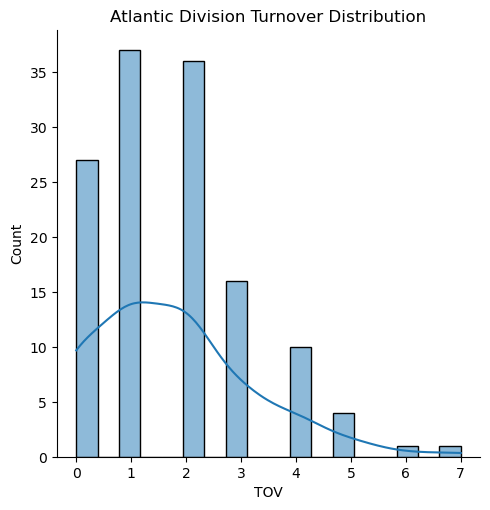

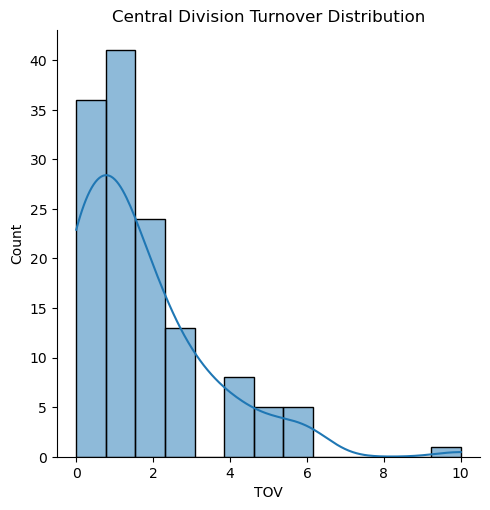

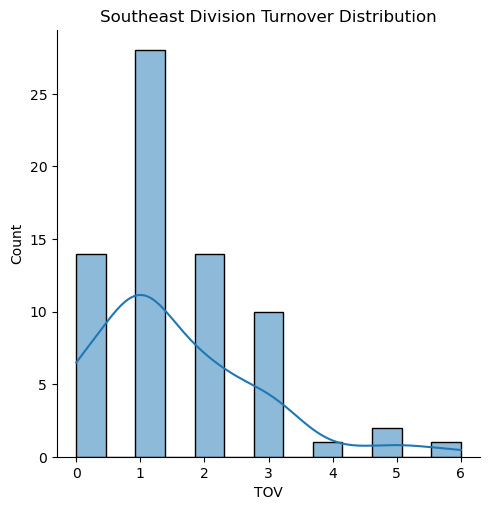

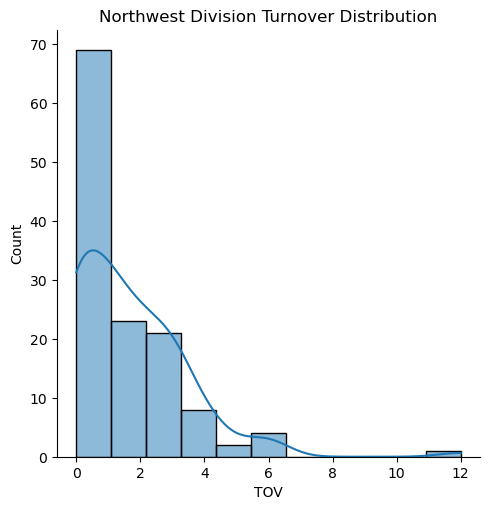

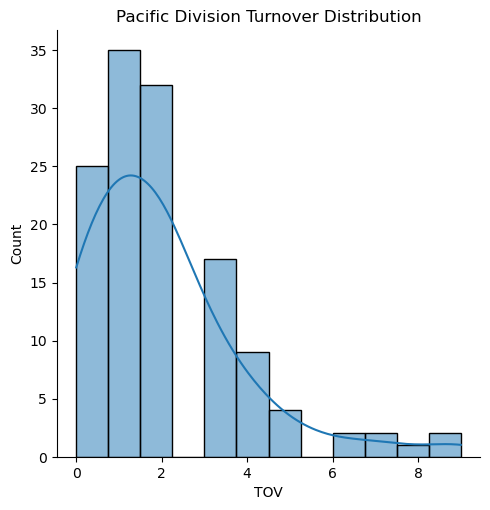

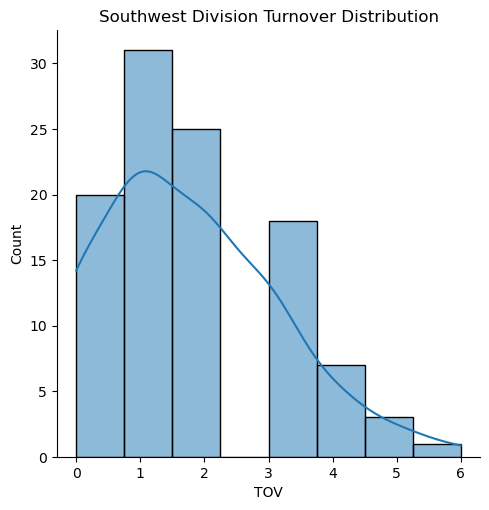

In [30]:
# Distributions of Turnovers by Division

sns.displot(data=Atlantic_Div, x="TOV", kde=True).set(title='Atlantic Division Turnover Distribution')
plt.show

sns.displot(data=Central_Div, x="TOV", kde=True).set(title='Central Division Turnover Distribution')
plt.show

sns.displot(data=Southeast_Div, x="TOV", kde=True).set(title='Southeast Division Turnover Distribution')
plt.show

sns.displot(data=Northwest_Div, x="TOV", kde=True).set(title='Northwest Division Turnover Distribution')
plt.show

sns.displot(data=Pacific_Div, x="TOV", kde=True).set(title='Pacific Division Turnover Distribution')
plt.show

sns.displot(data=Southwest_Div, x="TOV", kde=True).set(title='Southwest Division Turnover Distribution')
plt.show